# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

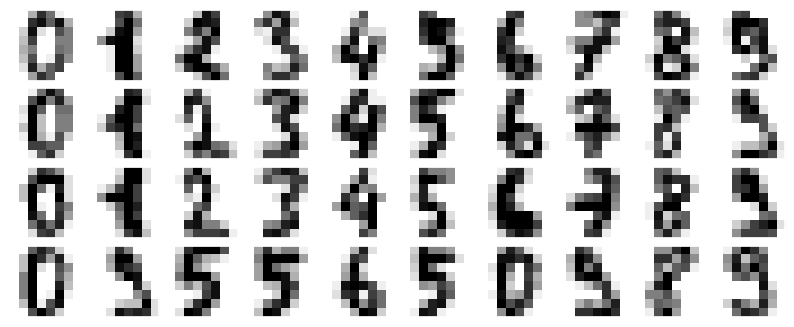

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Linear Kernel Accuracy: 0.94
RBF Kernel Accuracy: 0.95
Polynomial Kernel Accuracy: 0.94


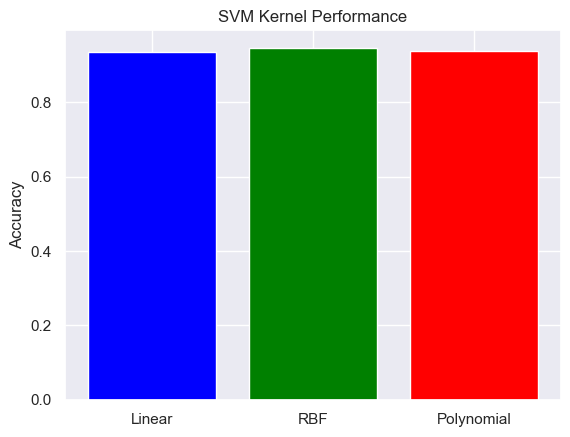

In [8]:

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

# Apply PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# Target values
y = digits.target

# Define parameter grids for RandomizedSearchCV
param_grid = {
    'C': np.logspace(-3, 3, 10),  # Regularization parameter
    'gamma': np.logspace(-4, 1, 10),  # Kernel coefficient
    'degree': [2, 3, 4]  # Only for polynomial kernel
}

# Linear Kernel SVM
svc_linear = SVC(kernel='linear')
linear_search = RandomizedSearchCV(svc_linear, {'C': param_grid['C']}, n_iter=10, cv=5, n_jobs=-1)
linear_search.fit(X_pca, y)

# Radial Basis Function (RBF) Kernel SVM
svc_rbf = SVC(kernel='rbf')
rbf_search = RandomizedSearchCV(svc_rbf, {'C': param_grid['C'], 'gamma': param_grid['gamma']}, n_iter=10, cv=5, n_jobs=-1)
rbf_search.fit(X_pca, y)

# Polynomial Kernel SVM
svc_poly = SVC(kernel='poly')
poly_search = RandomizedSearchCV(svc_poly, {'C': param_grid['C'], 'gamma': param_grid['gamma'], 'degree': param_grid['degree']}, n_iter=10, cv=5, n_jobs=-1)
poly_search.fit(X_pca, y)

# Best models from RandomizedSearchCV
best_linear = linear_search.best_estimator_
best_rbf = rbf_search.best_estimator_
best_poly = poly_search.best_estimator_

# 5-fold Cross-Validation
linear_scores = cross_val_score(best_linear, X_pca, y, cv=5)
rbf_scores = cross_val_score(best_rbf, X_pca, y, cv=5)
poly_scores = cross_val_score(best_poly, X_pca, y, cv=5)

# Results
print(f"Linear Kernel Accuracy: {linear_scores.mean():.2f}")
print(f"RBF Kernel Accuracy: {rbf_scores.mean():.2f}")
print(f"Polynomial Kernel Accuracy: {poly_scores.mean():.2f}")

# Comparison of accuracies
accuracies = [linear_scores.mean(), rbf_scores.mean(), poly_scores.mean()]
kernels = ['Linear', 'RBF', 'Polynomial']

plt.bar(kernels, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance')
plt.show()